# Assignment 2

## Q1

In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True) #disables the automatic downcasting of data types ()

In [2]:
df = pd.read_csv('./Cancer_dataset1.csv')

In [3]:
def stats(data, cols):
    filtered_data = data[columns]
    for column in filtered_data.columns:
        print(f"################ {column} Stats ##################")

        col = df[column]
        
        print(f"{column} count = {col.shape[0]}")
        print(f"{column} mean = {col.mean()}")
        print(f"{column} standard deviation = {col.std()}")
        print(f"{column} minimum = {col.min()}")
        print(f"{column} 25% percentile = {col.quantile(0.25)}")
        print(f"{column} 50% percentile = {col.quantile(0.5)}")
        print(f"{column} 75% percentile = {col.quantile(0.75)}")
        print(f"{column} maximum = {col.max()}")

        print("\n")


In [4]:
columns = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity','mean_concave_points']
# stats(df, columns)

In [5]:
#Summarize the statistics of variable into count, unique value, top value, and frequency of top value. 
outcome = df['outcome']
count = outcome.shape[0]
print(f"total rows = {count}")

unique_value = outcome.unique()
print(f"unique values = {unique_value}")

top_value = outcome.value_counts().index[0]
print(f"top value = {top_value}")

frequency_top = outcome.value_counts().max()
print(f"top value frequency = {frequency_top}")  

unique_val_counts = outcome.value_counts()
print(f"unique value frequency = {unique_val_counts}")

total rows = 198
unique values = ['N' 'R']
top value = N
top value frequency = 151
unique value frequency = outcome
N    151
R     47
Name: count, dtype: int64


In [6]:
# Encoding categorical to numerical
# R: Recurrence of the cancer.
# N: No recurrence of the cancer.

#label encoding: replacing category to integer value (since the category is of only two type, One-hot Encoding is not used)
encoded_outcome = outcome.replace({'R': 1, 'N': 0})
# encoded_outcome

In [7]:
# correlation between mean_perimeter and se_perimeter
print(f"correlation between mean_perimeter and se_perimeter = {df['mean_perimeter'].corr(df['se_perimeter'])}")

correlation between mean_perimeter and se_perimeter = 0.6099643781634989


In [8]:
df.head()

,id,outcome,time,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [9]:
# df.info()

In [10]:
# df.isnull().sum()

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# corr_matrix = df.drop(columns=['outcome', 'id']).corr()

# plt.figure(figsize=(20,20))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Matrix Heatmap")
# plt.show()

## Q2

In [13]:
#import libraries
import numpy as np
import pandas as pd
pd.set_option('future.no_silent_downcasting', True) #disables the automatic downcasting of data types ()
import matplotlib.pyplot as plt
import copy
import math

In [14]:
# This class manipulates data from a csv file
class ManipulateData:

    #initialize file
    def __init__(self, file):
        self.file = file

    #Reads the supplied file and shuffles the data
    def filter_data(self):
        data = pd.read_csv(self.file).dropna()
        data = data.sample(frac = 1, random_state=20) #shuffling and ensuring everytime output is same shuffled data
        return data

    #Filter with respect to column passed as an argument 
    def seperate_columns(self, data, columns):
        data = data[columns]
        return data

    #splits data to train and test data and returns train and test data as numpy array
    #only training percentage is passed as an argument 
    def split_data(self, data, percent):
        data_array = data.to_numpy()
        train_size = math.floor(len(data_array)*percent) #takes integer as training size
        #training and testing data are seperated as two numpy arrays inside tuple
        train_data, test_data = data_array[:train_size,:], data_array[train_size:,:] 

        
        train_length = train_data.shape[0]
        test_length = test_data.shape[0]
        print(f"total training rows: {train_length}\ntotal testing rows: {test_length}")
        
        return train_data, test_data

    #seperate features and target
    def seperate_target(self, data):
        rows = data.shape[0]
        features = []
        target = []
        for row in range(rows):
            features.append(data[row, :-1])
            target.append(data[row, -1])
        return np.array(features), np.array(target)

    # scale features using mean normalization and returns numpy array
    def scale_features(self, data):
        # calculate mean, minimum, and maximum for each column of the features
        feature_mean = np.mean(data, axis=0) #axis 0 refers to the column and axis 1 for row
        feature_max = np.max(data, axis=0)
        feature_min = np.min(data, axis=0)
        feature_std = np.std(data, axis=0)

        scaled_data = []

        # normalize and append each rows of features to new array 
        for row in data:
            scaled_row = []
            for i in range(len(row)):
                # scaled_value = (row[i] - feature_min[i]) / (feature_mean[i] - feature_min[i])
                scaled_value = (row[i] - feature_min[i]) / (feature_std[i])
                scaled_row.append(scaled_value)
            scaled_data.append(scaled_row)

        return np.array(scaled_data)
    

In [15]:
# Read file and clear out null values
file = 'Cancer_dataset1.csv'

df = ManipulateData(file)
data = df.filter_data() #cleans out rows containing null values and shuffles the data
data['outcome'] = data['outcome'].replace({'R': 1, 'N': 0}).astype(float)

In [16]:
#first seperate columns by passing column names and after required columns are obtained from the data we split 80% of data as training data
#index of the columns defined will be the same index on the array as well
columns = ['mean_area', 'outcome'] #the final column will be the target value when you use 'seperate_target(data) method
sprtd_data = df.seperate_columns(data, columns)

split_percent = 0.8
train_data, test_data = df.split_data(sprtd_data, split_percent)

# now seperate features and target as two seperate arrays with each features index corresponding to target index
features, target = df.seperate_target(train_data)
scaled_features = df.scale_features(features)

test_features, test_target = df.seperate_target(test_data)

total training rows: 145
total testing rows: 37


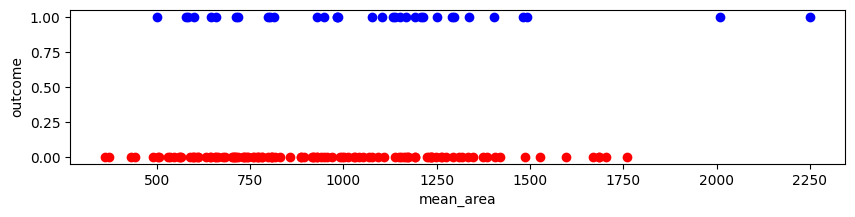

In [17]:
plt.figure(figsize=(10,2))
plt.scatter(features[target==0], target[target==0], color='red', label="N (No recurrence) / 0")
plt.scatter(features[target==1], target[target==1], color='blue', label="R (Recurrence) / 1")
# plt.scatter(scaled_features[target==0], target[target==0], color='red', label="N (No recurrence) / 0")
# plt.scatter(scaled_features[target==1], target[target==1], color='blue', label="R (Recurrence) / 1")
plt.xlabel('mean_area')
plt.ylabel('outcome')
plt.show()

In [18]:
class LL:
    # calculating cost using vectorization('np.dot()')
    def calculate_cost(self, features, target, th0, thj):
            
        m = features.shape[0]

        # use vectorization to find dot product of two matrices (features and weights)
        y_predict = th0 + np.dot(features, thj)

        sigmoid = 1/(1+np.exp(-y_predict))
        # print(f'sigmoid = {sigmoid}')
        
        cost = (target * np.log(sigmoid) + ((1-target) * np.log(1 - sigmoid)))
        
        total_cost = np.sum(cost) * (-1/m)
    
        return total_cost

In [57]:
class LogisticRegression(LL):
    def __init__(self, alpha, iterations):
        super().__init__()
        self.alpha = alpha
        self.iterations = iterations

    #this method computes gradient using vectorization and utilizes the broadcasting power of numpy
    def calculate_gradient(self, features, target, th0, thj):
        m = features.shape[0]
        
        y_predict = th0 + np.dot(features, thj) #get numpy array containing predicted y of each row
        y_predict = y_predict.astype(np.float64)
        sigmoid = 1 / (1 + np.exp(-y_predict)) # (broadcasting is used to do matrix manipulation)
        
        difference  = sigmoid - target
        gradient_th0 = np.sum(difference) / m #difference is an array of differences so we need to sum all and divide my number of rows

        #vectorization used to find dot product and gets matrix with the same shape of weight
        #broadcasting is utilized on difference and m
        gradient_thj = np.dot(difference, features) / m 

        return gradient_th0, gradient_thj

    # utilizes gradient descent formula  to get optimal weights and bias
    def gradient_descent(self, features, target, th0, thj):

        j_history = []
        
        for i in range(self.iterations):
            gradients = self.calculate_gradient(features, target, th0, thj)
            
            th0 = th0 - (self.alpha * gradients[0])
            thj = thj - (self.alpha * gradients[1])

            # check cost over iteration
            if i%10 == 0 or i == self.iterations - 1:
                current_cost = self.calculate_cost(features, target, th0, thj)
                j_history.append([i, current_cost])
                # print(f"Iteration: {i}\t Cost: {current_cost:.3f}\t Bias: {th0:.3f}\t Weight: {np.round(thj, 3)}")
                # print(f"Iteration: {i}\t Cost: {current_cost}\t Bias: {th0}\t Weight: {thj}")
        
        return th0, thj, j_history

    def predict(self, features, th0, thj, threshold):
        # use vectorization to find dot product of two matrices (features and weights)
        y_predict = th0 + np.dot(features, thj)

        sigmoid = 1/(1+np.exp(-y_predict))
        print(sigmoid)

        predictions = []
        # predictions[sigmoid<threshold] = 0
        for i in range(len(sigmoid)):
            if sigmoid[i] >= threshold:
                predictions.append(1)
            else:
                predictions.append(0)
        return np.array(predictions)

In [49]:
class Evaluation:
    

_IncompleteInputError: incomplete input (3307034802.py, line 2)

In [50]:
#initialize weight, biases and hyperparameters
bias = 0
weights = np.zeros(features.shape[1])
learning_rate = 0.01
iterations = 10000

#create object for linear regression class
fit = LogisticRegression(learning_rate, iterations)
# fit.calculate_gradient(np.array([[1],[2],[3],[4],[5],[6],[7],]), np.array([0,0,0,1,1,1,1]), bias, weights)


# compute final weights and biases using gradient descent
prdtd_bias, prdtd_weights, costs = fit.gradient_descent(scaled_features, target, bias, weights)
print(f"\n\nfinal bias = {prdtd_bias} \t final weights = {prdtd_weights}")

# fit.calculate_gradient(features, target, -5.000000145436743e-05, [-0.04881])




final bias = -1.7927698427655445 	 final weights = [0.33167834]


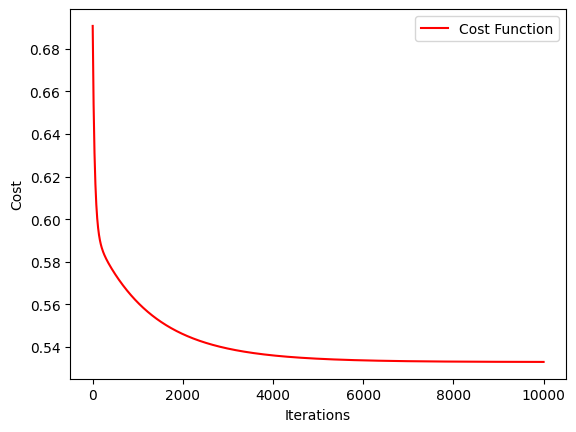

In [51]:
iterations = [iteration[0] for iteration in costs]
J = [j[1] for j in costs]


plt.plot(iterations, J, color='red', linestyle='-', label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

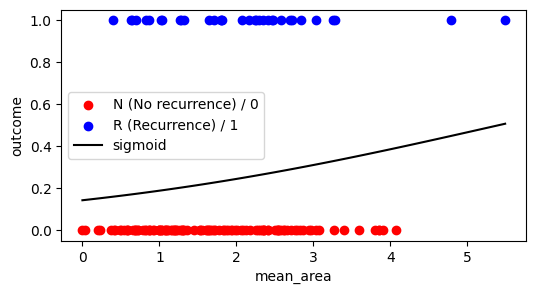

[array([0.14273347]),
 array([0.14499914]),
 array([0.14729459]),
 array([0.14962002]),
 array([0.15197562]),
 array([0.15436158]),
 array([0.15677807]),
 array([0.15922527]),
 array([0.16170334]),
 array([0.16421244]),
 array([0.16675273]),
 array([0.16932436]),
 array([0.17192747]),
 array([0.17456218]),
 array([0.17722863]),
 array([0.17992693]),
 array([0.18265719]),
 array([0.18541951]),
 array([0.18821399]),
 array([0.19104071]),
 array([0.19389974]),
 array([0.19679115]),
 array([0.199715]),
 array([0.20267132]),
 array([0.20566016]),
 array([0.20868154]),
 array([0.21173547]),
 array([0.21482197]),
 array([0.21794102]),
 array([0.2210926]),
 array([0.22427669]),
 array([0.22749323]),
 array([0.23074219]),
 array([0.2340235]),
 array([0.23733707]),
 array([0.24068281]),
 array([0.24406062]),
 array([0.2474704]),
 array([0.25091199]),
 array([0.25438527]),
 array([0.25789008]),
 array([0.26142624]),
 array([0.26499358]),
 array([0.26859189]),
 array([0.27222097]),
 array([0.27588

In [61]:
def sigmoid(feature, bias, weight):
    z = bias + (feature * weight)
    sig = 1 / (1 + np.exp(-z))

    return sig
    

# X = [x[0] for x in features]
X = np.linspace(min(scaled_features), max(scaled_features), 100)
# X = np.linspace(min(features), max(features), 100)

Y = [sigmoid(x, prdtd_bias, prdtd_weights[0]) for x in X]
# Y = [sigmoid(x, -2.21805736, 0.00102888) for x in X]


plt.figure(figsize=(6,3))
# plt.scatter(features[target==0], target[target==0], color='red', label="N (No recurrence) / 0")
# plt.scatter(features[target==1], target[target==1], color='blue', label="R (Recurrence) / 1")
plt.scatter(scaled_features[target==0], target[target==0], color='red', label="N (No recurrence) / 0")
plt.scatter(scaled_features[target==1], target[target==1], color='blue', label="R (Recurrence) / 1")

plt.plot(X, Y, color='black', linestyle='-', label='sigmoid')

plt.xlabel('mean_area')
plt.ylabel('outcome')
plt.legend()
plt.show()
Y

In [62]:
threshold = 0.5
prediction = fit.predict(scaled_features, prdtd_bias, prdtd_weights, threshold)
prediction

[0.28385606 0.26711408 0.270526   0.22172971 0.28641146 0.19992402
 0.19852399 0.32909353 0.18831046 0.18132262 0.16818502 0.18813364
 0.22206272 0.31332597 0.17020484 0.23470414 0.2987859  0.16438819
 0.26711408 0.31582118 0.19296766 0.27878678 0.373892   0.19646063
 0.17918517 0.16850906 0.3540269  0.17316707 0.22662715 0.19815598
 0.25520649 0.27033573 0.25926008 0.16027077 0.19349385 0.33101269
 0.20243467 0.28111954 0.27473316 0.23574504 0.26037284 0.15868079
 0.16067352 0.22786339 0.15231163 0.27762487 0.20341737 0.2622343
 0.18993726 0.14385815 0.2304356  0.22333143 0.29017094 0.18937406
 0.17265677 0.19417197 0.37028699 0.18904858 0.17267055 0.19212803
 0.22507591 0.18123674 0.28170458 0.21182507 0.23783642 0.18150879
 0.25192106 0.16380615 0.24029244 0.21640104 0.22118102 0.24082098
 0.29536245 0.22353222 0.33015903 0.2162539  0.20415281 0.30631494
 0.50708697 0.1746078  0.18492905 0.26354242 0.18235562 0.28977383
 0.44939896 0.270526   0.1657972  0.31270384 0.22334816 0.21782

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# x_train = np.array([[0.], [1], [2], [3], [4], [5]])
# y_train = np.array([0,  0, 0, 1, 1, 1])

# plt.figure(figsize=(6,3))
# plt.scatter(x_train[y_train==0], y_train[y_train==0], color='red', label="N (No recurrence) / 0")
# plt.scatter(x_train[y_train==1], y_train[y_train==1], color='blue', label="R (Recurrence) / 1")

In [ ]:
# bias_t = 0.1
# weights_t = np.zeros(features.shape[1])
# learning_rate_t = 0.1
# iterations_t = 500

# fit_t = LogisticRegression(learning_rate_t, iterations_t)

# x_train = np.array([[1], [2], [3], [4], [5], [6], [7], [30], [40], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20]])
# y_train = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# prdtd_bias_t, prdtd_weights_t, costs_t = fit_t.gradient_descent(x_train, y_train, bias_t, [0.2])#weights_t)
# print(f"\n\nfinal bias = {prdtd_bias_t} \t final weights = {prdtd_weights_t}")

In [ ]:
# def sigmoid_t(feature, bias, weight):
#     z = bias + (feature * weight)
#     sig = 1 / (1 + np.exp(-z))

#     return sig
    

# # X_t = [x[0] for x in x_train]
# X_t = np.linspace(min(x_train), max(x_train), 100)
# Y_t = [sigmoid_t(x, prdtd_bias_t, prdtd_weights_t[0]) for x in X_t]

# plt.figure(figsize=(6,3))
# plt.scatter(x_train[y_train==0], y_train[y_train==0], color='red', label="N (No recurrence) / 0")
# plt.scatter(x_train[y_train==1], y_train[y_train==1], color='blue', label="R (Recurrence) / 1")

# plt.plot(X_t, Y_t, color='pink', linestyle='-', label='sigmoid')

# plt.xlabel('mean_area')
# plt.ylabel('outcome')
# plt.legend()
# plt.show()

In [ ]:
rand = np.random.rand(3,2)
rand

In [ ]:
np.exp(-rand)

In [ ]:
a = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0]
a = np.array(a)
print(a)
print(type(a))
print(type(a[0]))
np.exp(-a)